Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [42]:
import pandas as pd

customer_data_raw = pd.read_csv('../data/raw/Mall_Customers.csv')
customer_data_raw.head()
# customer_data_raw.shape

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 🔁 Orden correcto recomendado:

1. Recolectar / cargar los datos
2. Limpiar / transformar
3. Estandarizar (StandardScaler)
4. (Opcional) Reducir dimensiones (PCA, UMAP, etc.)
5. Aplicar clustering (KMeans, DBSCAN, etc.)
6. Evaluar y visualizar


## Estandarización

In [70]:
from sklearn.preprocessing import StandardScaler

columns = customer_data_raw.columns[-3:]
tmp_data_to_process = customer_data_raw[columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(tmp_data_to_process)

print("Antes de escalar: \n", tmp_data_to_process.head())
print("Después de escalar: \n", scaled_data[:5])


Antes de escalar: 
    Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
Después de escalar: 
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


📌 Escala de interpretación del índice de Silhouette
| Valor           | Interpretación general                          |
| --------------- | ----------------------------------------------- |
| **< 0.25**      | Estructura débil o sin clusters reales          |
| **0.25 – 0.50** | Agrupamientos posibles pero superpuestos        |
| **0.50 – 0.70** | Buena estructura de clusters                    |
| **> 0.70**      | Estructura de clustering fuerte y bien definida |


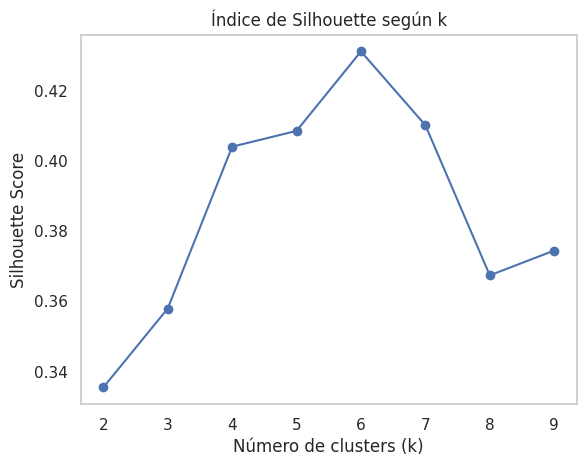

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.title("Índice de Silhouette según k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

## Clustering

### Basado en centroides

📊 Comparación rápida
| Función         | ¿Entrena? (`fit`) | ¿Predice etiquetas? (`predict`) | ¿Devuelve distancias? (`transform`) | Resultado principal     |
| --------------- | ----------------- | ------------------------------- | ----------------------------------- | ----------------------- |
| `fit_predict`   | ✅                 | ✅                               | ❌                                   | Etiquetas de cluster    |
| `fit_transform` | ✅                 | ❌                               | ✅                                   | Distancias a centroides |


In [57]:
from sklearn.cluster import KMeans

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# data_processor = kmeans.fit_transform(scaled_data)
kmeans.fit_predict(scaled_data)

print("Centroides: \n", kmeans.cluster_centers_)
print("Etiquetas de los clusters: \n", kmeans.labels_)
# print("(Puntos , clusters): \n", data_processor.shape)

Centroides: 
 [[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]
Etiquetas de los clusters: 
 [2 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 2 5 2 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 0 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


## Evaluación de modelos de clustering

### Índice de Silhouette

⚠️ Consideraciones:

    Solo se puede usar si hay 2 o más clusters (no sirve si todos los puntos están en el mismo grupo o hay solo uno).

    Funciona bien con clustering por distancia (KMeans, DBSCAN, GMM...).

In [45]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Índice de Silhouette: {silhouette_avg:.2f}")

Índice de Silhouette: 0.43


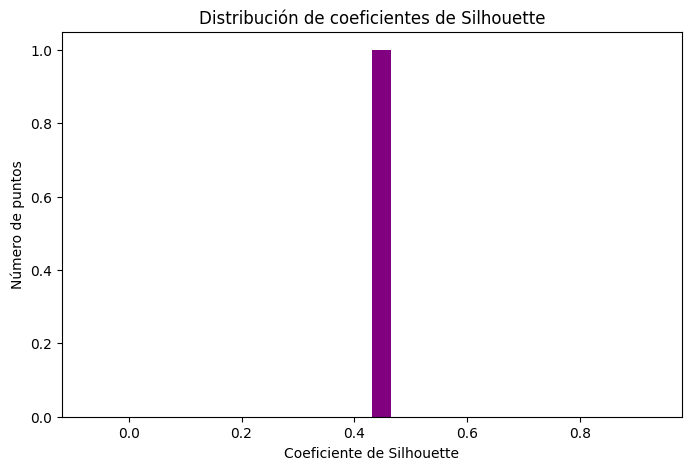

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(silhouette_avg, bins=30, color="purple")
plt.title("Distribución de coeficientes de Silhouette")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Número de puntos")
plt.show()

🧠 ¿Qué podrías hacer con ese resultado?
| Posible causa                      | Qué podrías probar                     |
| ---------------------------------- | -------------------------------------- |
| Número de clusters no es el óptimo | Prueba con más o menos clusters (K)    |
| Datos mal escalados                | Revisa si aplicaste `StandardScaler`   |
| Forma no lineal de los datos       | Usa **DBSCAN** o **OPTICS**, no KMeans |
| Alta dimensionalidad               | Aplica PCA o UMAP antes de clustering  |
| Mucho ruido o outliers             | Filtra outliers o prueba DBSCAN        |


## Reducción de dimensiones

| Casos típicos                                           | ¿Reducir dimensiones? |
| ------------------------------------------------------- | --------------------- |
| Dataset pequeño, pocas variables numéricas              | ❌ No es necesario     |
| Dataset con muchas columnas (texto, imágenes, sensores) | ✅ Sí, ayuda mucho     |
| Quieres visualizar los clusters                         | ✅ PCA, T-SNE, UMAP    |
| Estás explorando y no sabes cuántos clusters hay        | ✅ Primero visualiza   |


### PCA (Principal Component Analysis)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dim_reduction_results = pca.fit_transform(scaled_data)
dim_reduction_results.shape

(200, 2)

## Visualización

In [60]:
df_cluster_results = pd.concat(
    [
        customer_data_raw[["CustomerID"]],
        pd.DataFrame(
            # data_processor,
            scaled_data,
            columns=columns
        ),
        pd.DataFrame(
            kmeans.labels_,
            columns=["cluster"]
        )
    ],
    axis=1
)
df_cluster_results.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,-1.424569,-1.738999,-0.434801,5
1,2,-1.281035,-1.738999,1.195704,4
2,3,-1.352802,-1.700830,-1.715913,5
3,4,-1.137502,-1.700830,1.040418,4
4,5,-0.563369,-1.662660,-0.395980,5


In [61]:
df_dim_redution_results = pd.concat(
  [
    customer_data_raw[["CustomerID"]],
    pd.DataFrame(
      dim_reduction_results,
      columns=["dim1", "dim2"]
    ),
  ],
  axis=1
)
df_dim_redution_results.head()

,CustomerID,dim1,dim2
0,1,-0.615720,-1.763481
1,2,-1.665793,-1.820747
2,3,0.337862,-1.674799
3,4,-1.456573,-1.772430
4,5,-0.038465,-1.662740


In [62]:
df_final = df_cluster_results.merge(df_dim_redution_results, on="CustomerID")
df_final

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster,dim1,dim2
0,1,-1.424569,-1.738999,-0.434801,5,-0.615720,-1.763481
1,2,-1.281035,-1.738999,1.195704,4,-1.665793,-1.820747
2,3,-1.352802,-1.700830,-1.715913,5,0.337862,-1.674799
3,4,-1.137502,-1.700830,1.040418,4,-1.456573,-1.772430
4,5,-0.563369,-1.662660,-0.395980,5,-0.038465,-1.662740
...,...,...,...,...,...,...,...
195,196,-0.276302,2.268791,1.118061,7,-1.093705,2.215577
196,197,0.441365,2.497807,-0.861839,2,0.800448,2.540748
197,198,-0.491602,2.497807,0.923953,7,-1.119709,2.445169
198,199,-0.491602,2.917671,-1.250054,2,0.395411,2.946665


<Axes: xlabel='dim1', ylabel='dim2'>

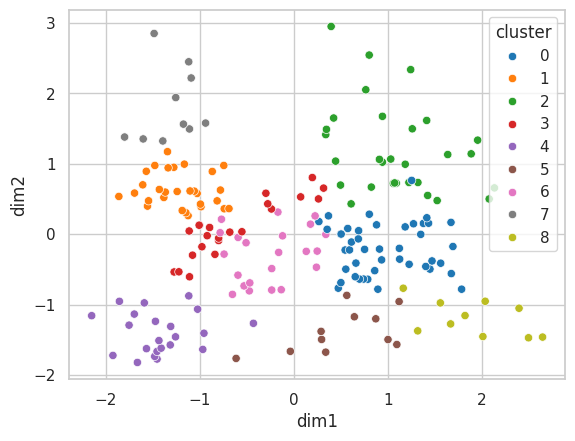

In [63]:
import seaborn as sns
sns.set_style("whitegrid")

sns.scatterplot(x="dim1", y="dim2", data=df_final, hue="cluster",palette="tab10")

# Resume

## Algoritmos de clustering

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Inicializar diccionario de resultados
results = {}

# KMeans con diferentes k
k_range = range(2, 10)
kmeans_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    kmeans_scores.append(score)

results['KMeans'] = (list(k_range), kmeans_scores)

# DBSCAN (probar varios eps)
eps_values = [0.2, 0.4, 0.6, 0.8, 1.0]
dbscan_scores = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(scaled_data)
    
    # Ignorar casos con 1 solo cluster o todo ruido
    if len(set(labels)) > 1 and -1 not in set(labels):
        score = silhouette_score(scaled_data, labels)
    else:
        score = -1
    dbscan_scores.append(score)

results['DBSCAN'] = (eps_values, dbscan_scores)


# OPTICS (probar diferentes min_samples)
min_samples_values = [3, 5, 10, 15, 20]
optics_scores = []

for m in min_samples_values:
    optics = OPTICS(min_samples=m)
    labels = optics.fit_predict(scaled_data)
    
    if len(set(labels)) > 1 and -1 not in set(labels):
        score = silhouette_score(scaled_data, labels)
    else:
        score = -1
    optics_scores.append(score)

results['OPTICS'] = (min_samples_values, optics_scores)


# GMM (Gaussian Mixture Models)
gmm_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    gmm_scores.append(score)

results['GMM'] = (list(k_range), gmm_scores)

## Métricas con Silhouette

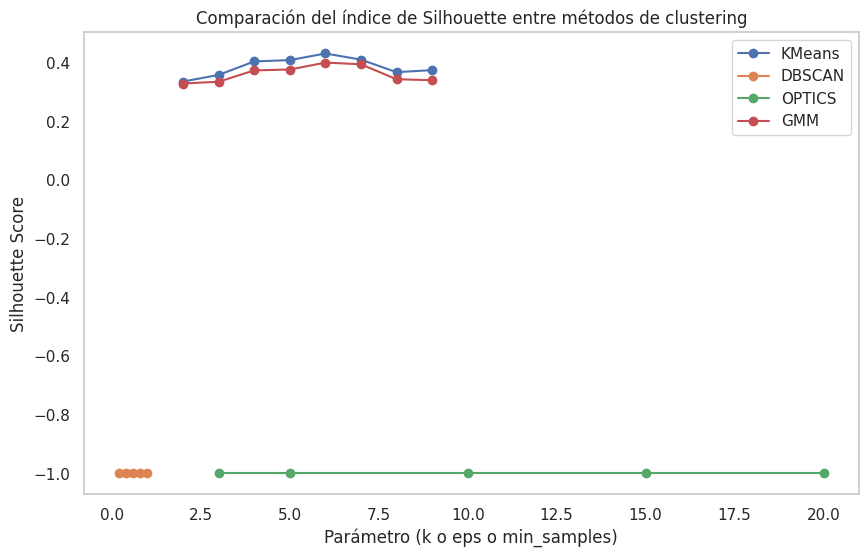

In [ ]:
plt.figure(figsize=(10, 6))

for method, (x_vals, scores) in results.items():
    plt.plot(x_vals, scores, marker='o', label=method)

plt.title("Comparación del índice de Silhouette entre métodos de clustering")
plt.xlabel("Parámetro (k o eps o min_samples)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.legend()
plt.show()


# Algoritmos No Supervisados Avanzados

## Kmeans

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

inertias = []
silhouette_scores = []
davies_scores = []
calinski_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)

    # Inercia (método del codo)
    inertias.append(kmeans.inertia_)

    # Índice de Silhouette
    sil_score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(sil_score)

    # Davies-Bouldin (bajo es mejor)
    db_score = davies_bouldin_score(scaled_data, labels)
    davies_scores.append(db_score)

    # Calinski-Harabasz (alto es mejor)
    ch_score = calinski_harabasz_score(scaled_data, labels)
    calinski_scores.append(ch_score)


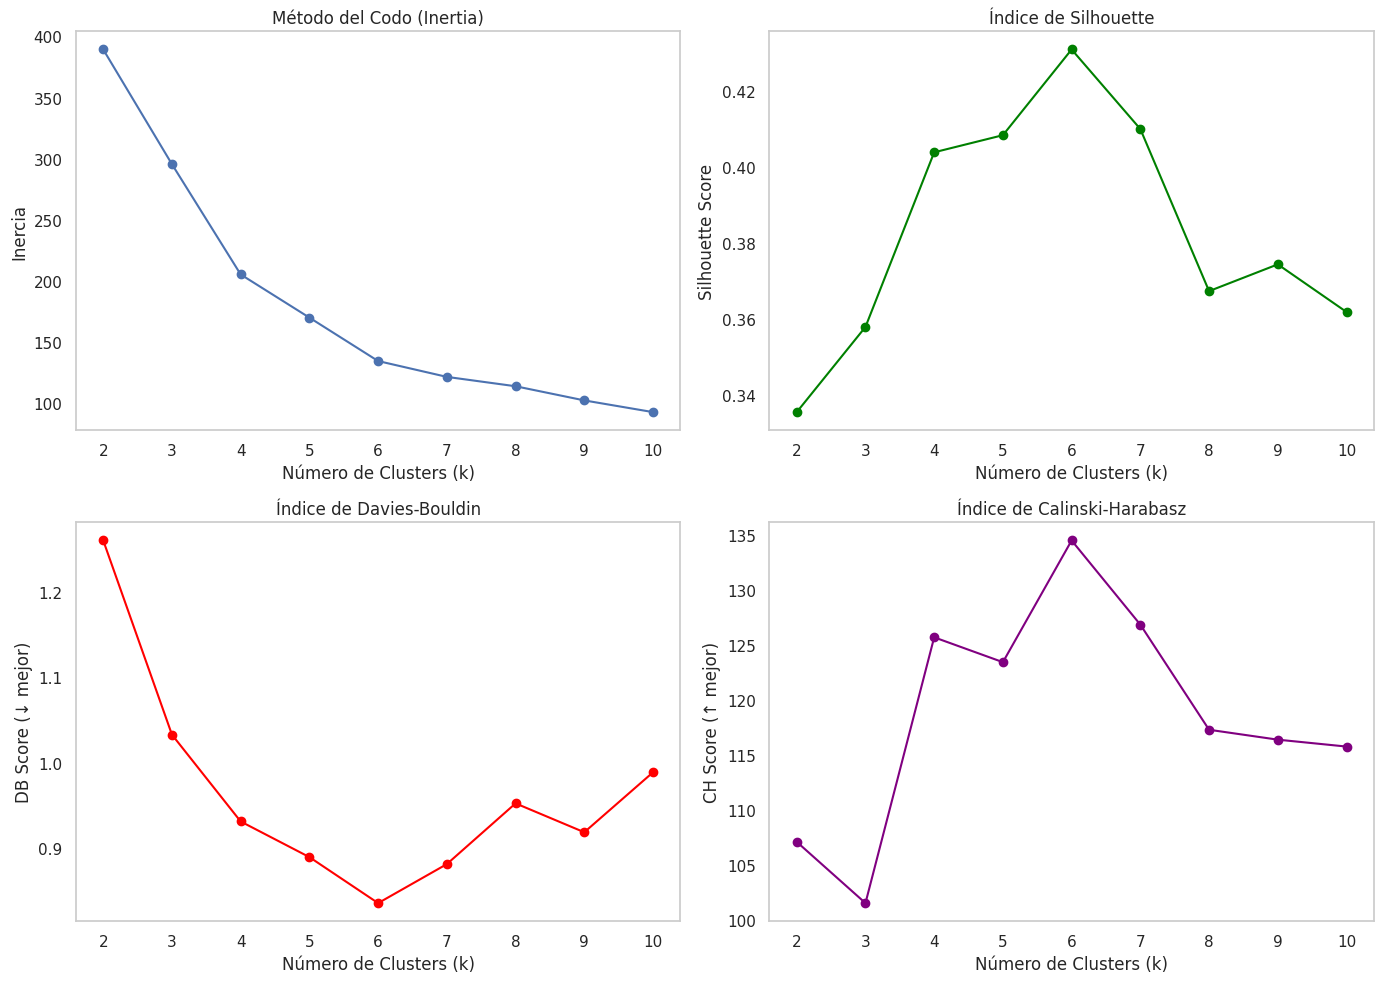

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Método del Codo (Inertia)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Índice de Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(k_range, davies_scores, marker='o', color='red')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("DB Score (↓ mejor)")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(k_range, calinski_scores, marker='o', color='purple')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("CH Score (↑ mejor)")
plt.grid()

plt.tight_layout()
plt.show()



## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# Rangos de eps a probar (puedes ajustar estos valores según tus datos)
eps_range = np.arange(0.1, 1.1, 0.1)

# Resultados
silhouette_scores = []
davies_scores = []
calinski_scores = []

for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(scaled_data)
    
    # Validar que haya al menos 2 clusters y que no sean todos outliers (-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        sil_score = silhouette_score(scaled_data, labels)
        db_score = davies_bouldin_score(scaled_data, labels)
        ch_score = calinski_harabasz_score(scaled_data, labels)
    else:
        # Clustering inválido: solo un cluster o todo outlier
        sil_score = np.nan
        db_score = np.nan
        ch_score = np.nan
    
    silhouette_scores.append(sil_score)
    davies_scores.append(db_score)
    calinski_scores.append(ch_score)


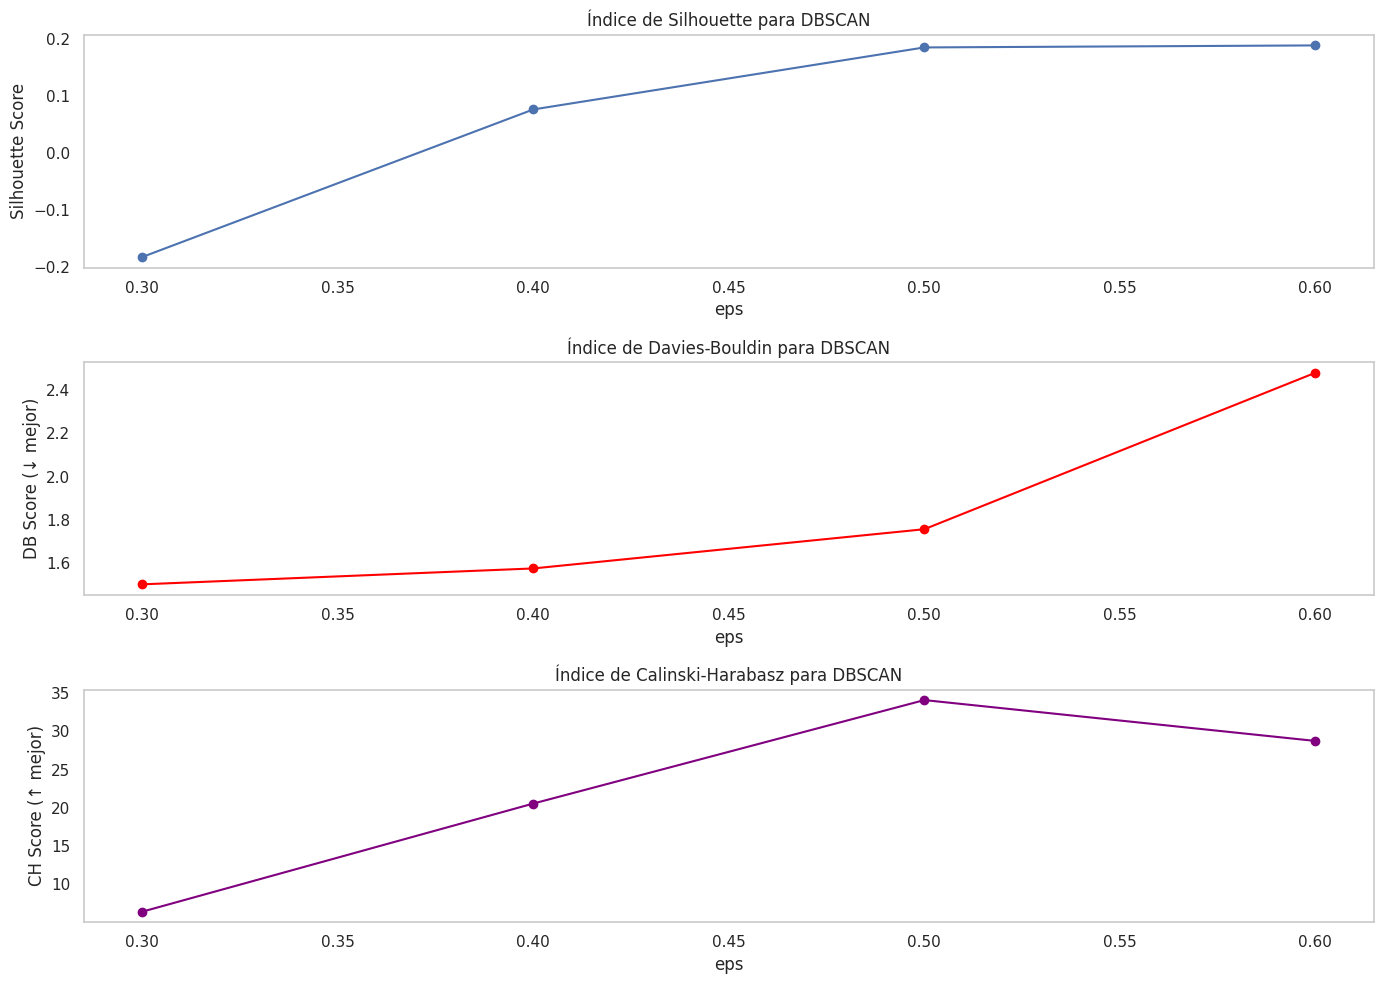

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(eps_range, silhouette_scores, marker='o', label='Silhouette')
plt.title("Índice de Silhouette para DBSCAN")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(eps_range, davies_scores, marker='o', color='red', label='Davies-Bouldin')
plt.title("Índice de Davies-Bouldin para DBSCAN")
plt.xlabel("eps")
plt.ylabel("DB Score (↓ mejor)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(eps_range, calinski_scores, marker='o', color='purple', label='Calinski-Harabasz')
plt.title("Índice de Calinski-Harabasz para DBSCAN")
plt.xlabel("eps")
plt.ylabel("CH Score (↑ mejor)")
plt.grid()

plt.tight_layout()
plt.show()


## OPTICS

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# Rango de valores para el parámetro min_samples
min_samples_range = range(3, 21, 2)

# Inicializar listas de resultados
silhouette_scores = []
davies_scores = []
calinski_scores = []

for min_s in min_samples_range:
    optics = OPTICS(min_samples=min_s)
    labels = optics.fit_predict(scaled_data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        sil = silhouette_score(scaled_data, labels)
        db = davies_bouldin_score(scaled_data, labels)
        ch = calinski_harabasz_score(scaled_data, labels)
    else:
        sil = np.nan
        db = np.nan
        ch = np.nan

    silhouette_scores.append(sil)
    davies_scores.append(db)
    calinski_scores.append(ch)


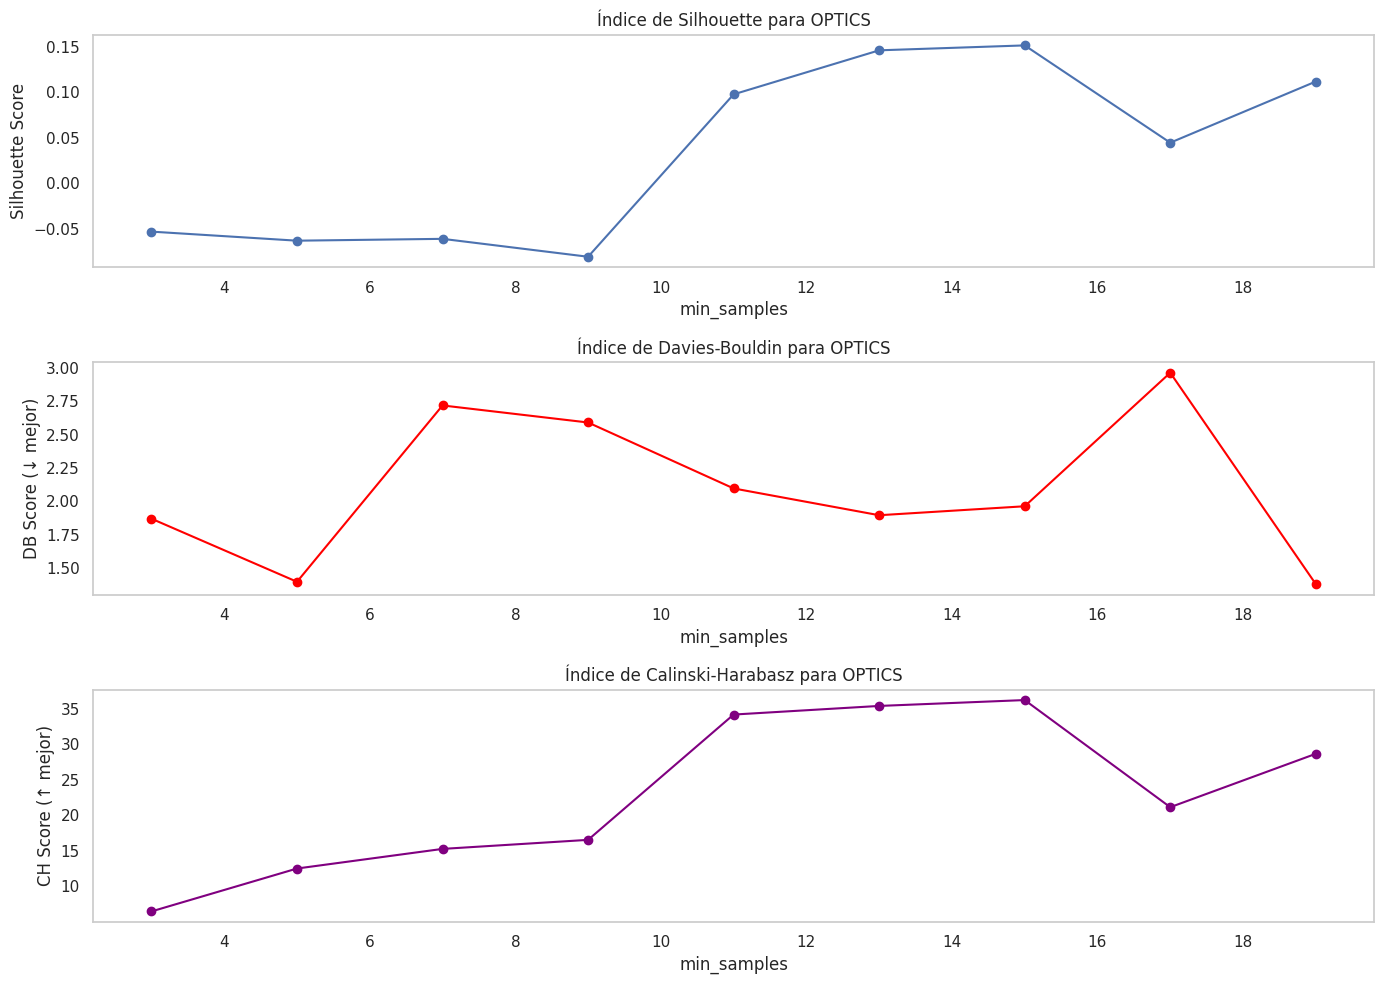

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(min_samples_range, silhouette_scores, marker='o', label='Silhouette')
plt.title("Índice de Silhouette para OPTICS")
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(min_samples_range, davies_scores, marker='o', color='red', label='Davies-Bouldin')
plt.title("Índice de Davies-Bouldin para OPTICS")
plt.xlabel("min_samples")
plt.ylabel("DB Score (↓ mejor)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(min_samples_range, calinski_scores, marker='o', color='purple', label='Calinski-Harabasz')
plt.title("Índice de Calinski-Harabasz para OPTICS")
plt.xlabel("min_samples")
plt.ylabel("CH Score (↑ mejor)")
plt.grid()

plt.tight_layout()
plt.show()


## GMM

In [85]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Rango de número de componentes a evaluar
k_range = range(2, 11)

# Inicializar listas de resultados
silhouette_scores = []
davies_scores = []
calinski_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    
    # Verificar que haya al menos 2 clusters distintos
    if len(set(labels)) > 1:
        sil = silhouette_score(scaled_data, labels)
        db = davies_bouldin_score(scaled_data, labels)
        ch = calinski_harabasz_score(scaled_data, labels)
    else:
        sil = np.nan
        db = np.nan
        ch = np.nan

    silhouette_scores.append(sil)
    davies_scores.append(db)
    calinski_scores.append(ch)


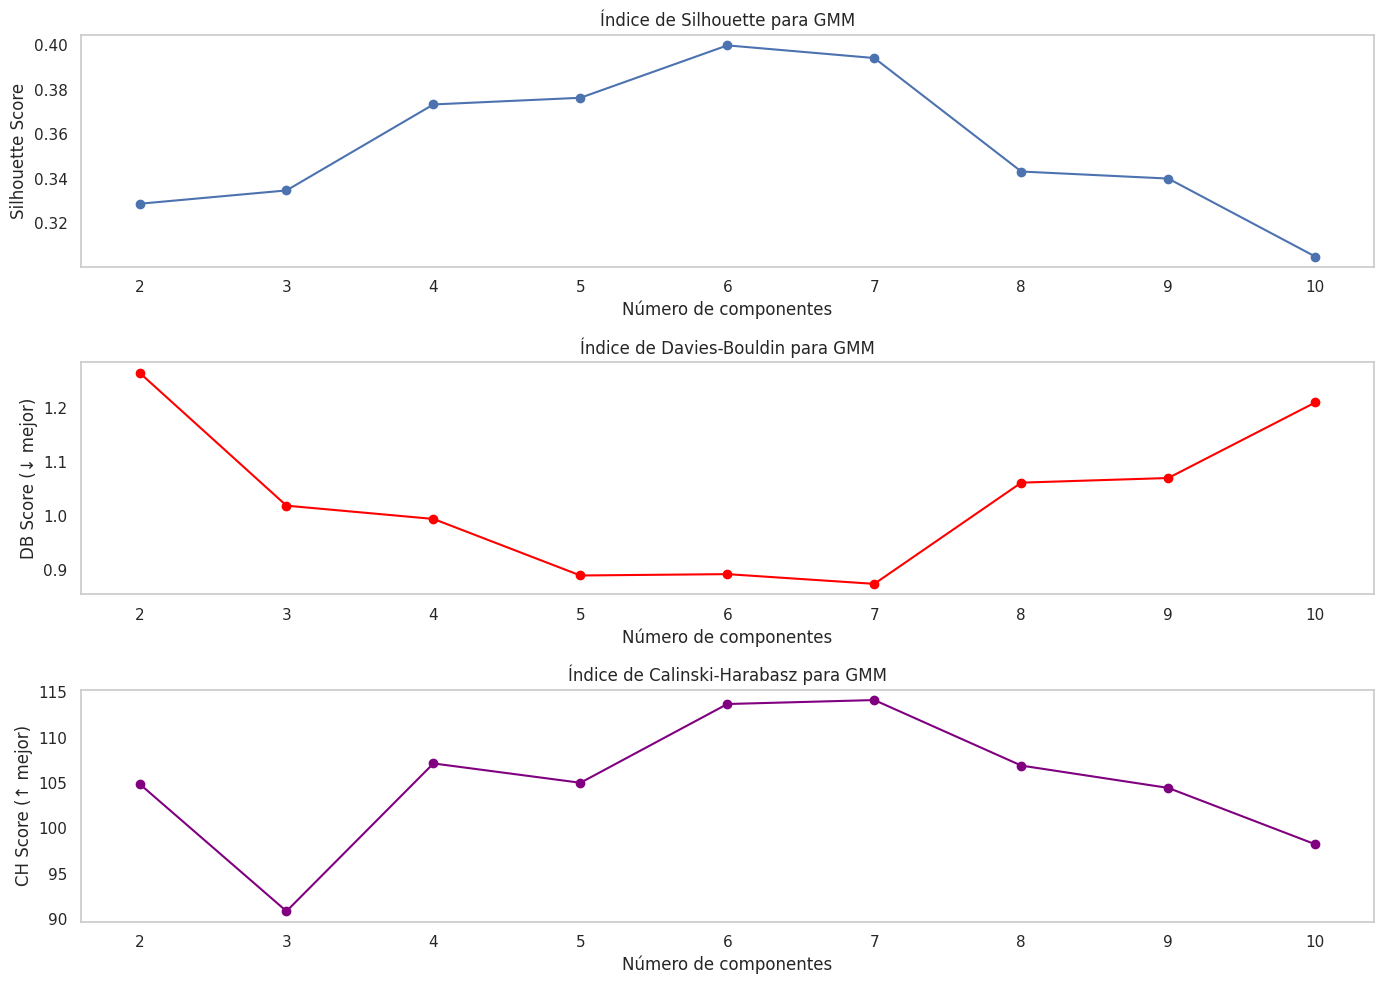

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette')
plt.title("Índice de Silhouette para GMM")
plt.xlabel("Número de componentes")
plt.ylabel("Silhouette Score")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(k_range, davies_scores, marker='o', color='red', label='Davies-Bouldin')
plt.title("Índice de Davies-Bouldin para GMM")
plt.xlabel("Número de componentes")
plt.ylabel("DB Score (↓ mejor)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(k_range, calinski_scores, marker='o', color='purple', label='Calinski-Harabasz')
plt.title("Índice de Calinski-Harabasz para GMM")
plt.xlabel("Número de componentes")
plt.ylabel("CH Score (↑ mejor)")
plt.grid()

plt.tight_layout()
plt.show()
